In [1]:
import os
import numpy as np
import cv2
from random import randint
import matplotlib.pyplot as plt
#from keras import backend as K
#import tensorflow as tf
#from keras.models import load_model
#import re
#import scipy

In [2]:
%matplotlib inline

In [3]:
os.chdir('SWED_sample/')
os.getcwd()

'/Users/vihaan/Academics/Quarter2/CV/EdgeAttn-UNet/SWED_sample'

In [4]:
image_path = os.path.join(os.getcwd(),"train/images/")
mask_path = os.path.join(os.getcwd(),"train/labels/")
#image_list = os.listdir(image_path)
#image_list_sorted = image_list.sort(key=lambda f: int(re.sub('\D', '', f)))

In [5]:
image_dict = {}
mask_dict = {}
image_list = os.listdir(image_path)
mask_list = os.listdir(mask_path)
#print(image_list)

#image_list.sort(key=lambda f: int(re.sub('\D', '', f)))

In [6]:
#for iteration, img in enumerate(os.listdir(image_path)):
for i in range(len(image_list)):
    #print('iteration ' + str(i))
    
    image_dict[image_list[i]] = np.load(os.path.join(image_path,image_list[i])).astype(np.float32)
#     except:
#         continue
#     l_lip = ['{0:05}'.format(int(image_list[i].split('.',1)[0])) + '_l_lip']
#     u_lip = ['{0:05}'.format(int(image_list[i].split('.',1)[0])) + '_u_lip']
            
#     if os.path.exists(os.path.join(mask_path,l_lip[0]+'.png')):
#         l_lip_image = cv2.imread(os.path.join(mask_path,l_lip[0]+'.png'))
#     else:
#         l_lip_image = np.zeros(image_dict[image_list[i]].shape)
            
#     if os.path.exists(os.path.join(mask_path,u_lip[0]+'.png')):
#         u_lip_image = cv2.imread(os.path.join(mask_path,u_lip[0]+'.png'))
#     else:
#         u_lip_image = np.zeros(image_dict[image_list[i]].shape)
                
#     mask_dict[image_list[i]] = l_lip_image + u_lip_image
        

print(image_dict[image_list[0]].shape)


(256, 256, 12)


In [7]:
print(len(image_dict))

1764


In [8]:
# Obtaining the labels
#for iteration, img in enumerate(os.listdir(image_path)):
for i in range(len(mask_list)):
    #print('iteration ' + str(i))
    
    mask_dict[mask_list[i]] = np.load(os.path.join(mask_path,mask_list[i])).astype(np.float32)
    
#     except:
#         continue
#     l_lip = ['{0:05}'.format(int(image_list[i].split('.',1)[0])) + '_l_lip']
#     u_lip = ['{0:05}'.format(int(image_list[i].split('.',1)[0])) + '_u_lip']
            
#     if os.path.exists(os.path.join(mask_path,l_lip[0]+'.png')):
#         l_lip_image = cv2.imread(os.path.join(mask_path,l_lip[0]+'.png'))
#     else:
#         l_lip_image = np.zeros(image_dict[image_list[i]].shape)
            
#     if os.path.exists(os.path.join(mask_path,u_lip[0]+'.png')):
#         u_lip_image = cv2.imread(os.path.join(mask_path,u_lip[0]+'.png'))
#     else:
#         u_lip_image = np.zeros(image_dict[image_list[i]].shape)
                
#     mask_dict[image_list[i]] = l_lip_image + u_lip_image
        

print(mask_dict[mask_list[0]].shape)
print(len(mask_dict))

(1, 256, 256)
1764


In [9]:
#with np.printoptions(threshold=sys.maxsize):
#    print(list(mask_dict.values())[0])
    
#list(mask_dict.values())[0]

#for ij in np.ndindex(list(mask_dict.values())[0].shape[:2]):
#    print(ij, list(mask_dict.values())[0][ij])

In [10]:
#print(os.getcwd())
#image_path = os.path.join(os.getcwd(),"CelebA-HQ-img/")
#mask_path = os.path.join(os.getcwd(),"CelebAMask-HQ-mask-anno/0")

#print(image_path)
#print(mask_path)

In [11]:
#%%capture --no-display
# Give the path for the Images and masks
#images_path = os.path.join(os.getcwd(),"CelebA-HQ-img/")
#mask_path = os.path.join(os.getcwd(),"CelebAMask-HQ-mask-anno/0")

# Save the images to .npy files
#image_dict, mask_dict = convert_images.read_images(images_path, mask_path)
#convert_images.to_npy(image_dict, mask_dict)

In [12]:
print(len(image_dict))

image = []
mask = []
for img, msk in zip(image_dict.values(), mask_dict.values()):
    #print(len(img))
    #print(len(msk))
    image.append(img)
    mask.append(msk)
    

#Converting list to np array
image = np.array(image)
mask = np.array(mask)


print(image[0].shape)
print(mask[0].shape)
#mask = mask[:,:,:,1]
#mask = np.expand_dims(mask, axis=-1)

1764
(256, 256, 12)
(1, 256, 256)


In [13]:
print(len(image))
print(len(mask))

1764
1764


In [14]:
X_train = image
Y_train = mask

In [37]:
#Y_train = np.where(Y_train > 1, 1, 0)

In [15]:
print("Number of Images:", X_train.shape[0])
print("Shape of Images:", X_train.shape[1],"x", X_train.shape[1])

print("Number of Masks:", Y_train.shape[0])
print("Shape of Masks:", Y_train.shape[1],"x", Y_train.shape[1])

print(X_train.shape)
print(Y_train.shape)

Number of Images: 1764
Shape of Images: 256 x 256
Number of Masks: 1764
Shape of Masks: 1 x 1
(1764, 256, 256, 12)
(1764, 1, 256, 256)


In [16]:
#print(len(x_train), len(y_train), len(x_valid), len(y_valid))
print(len(X_train),len(Y_train))

1764 1764


In [17]:
from PIL import Image

import torch

import torchvision.transforms as transforms
import numpy as np

import models
import edge_algs

In [18]:
model = models.EdgeU1_Net(img_ch=12,output_ch=1)
model1 = models.AttU_Net(img_ch=12,output_ch=1)
#print(model)

In [24]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(X_train, batch_size=50, shuffle=False)
label_dataloader = DataLoader(Y_train, batch_size=50, shuffle=False)

In [25]:
input_train = next(iter(train_dataloader))
label_train = next(iter(label_dataloader))
input_train = input_train.transpose(1,3)

print(input_train.size())
print(label_train.size())
#print(model(train_features).size())


torch.Size([50, 12, 256, 256])
torch.Size([50, 1, 256, 256])


In [26]:
y_pred = model(input_train)
print(y_pred.size())

torch.Size([50, 1, 256, 256])


In [29]:
loss_fn = torch.nn.MSELoss(reduction='sum')
learning_rate = 1e-6
loss = loss_fn(y_pred, label_train)
print(loss)

tensor(1351632.6250, grad_fn=<MseLossBackward0>)


In [ ]:
#Traning the model - an attempt
model = models.AttU_Net(img_ch=12,output_ch=1)
device = torch.device("mps")
print(device)

loss_fn = torch.nn.MSELoss(reduction='sum')
learning_rate = 1e-6

for t in range(100):
    y_pred = model(input_train)
    loss = loss_fn(y_pred, label_train)
    print(t, loss.item())
    model.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
    

mps
0 1502599.875


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([158., 241., 189.])
torch.Size([256, 256, 3])


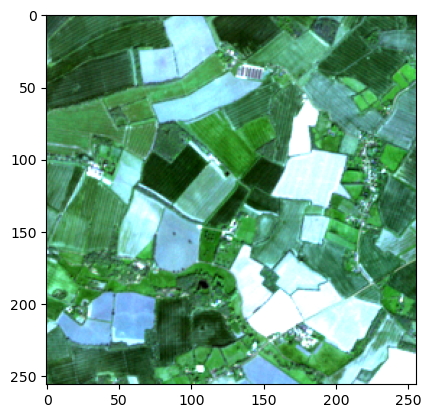

In [29]:
temp = train_features[0].transpose(0,2)
temp = train_features[0][:,:,1:4]
print(temp[0][0][0:3])
print(temp.size())
plt.imshow(temp*0.001)

tensor([[[-0.5468],
         [ 0.0043],
         [-0.7375],
         ...,
         [-0.3747],
         [-0.3353],
         [-0.0414]],

        [[-0.4314],
         [ 0.4360],
         [-0.3885],
         ...,
         [-0.5827],
         [-0.2945],
         [ 0.0740]],

        [[-0.0008],
         [ 0.2575],
         [-0.0433],
         ...,
         [-0.6935],
         [ 0.1744],
         [ 0.1071]],

        ...,

        [[ 0.2595],
         [ 0.0325],
         [-0.1625],
         ...,
         [ 0.6130],
         [ 0.1778],
         [ 0.1766]],

        [[-0.1338],
         [-0.1535],
         [-0.4128],
         ...,
         [-0.0734],
         [ 0.1580],
         [ 0.3591]],

        [[-0.5299],
         [-0.4890],
         [-0.2535],
         ...,
         [-0.2245],
         [ 0.3490],
         [-0.0657]]], grad_fn=<TransposeBackward0>)
torch.Size([256, 256, 1])


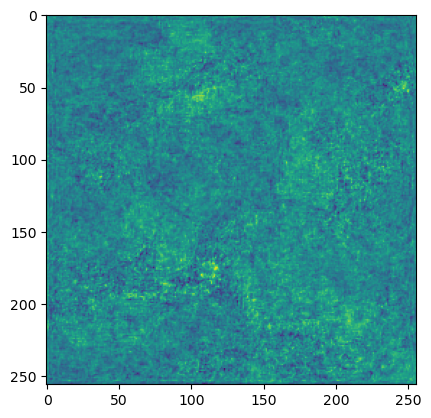

In [33]:
#What is coming out?
temp = model(train_features)[0].transpose(0,2)
print(temp)
print(temp.size())
uuiu = temp
plt.imshow(uuiu.detach().numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([189., 241., 158.])
torch.Size([256, 256, 3])


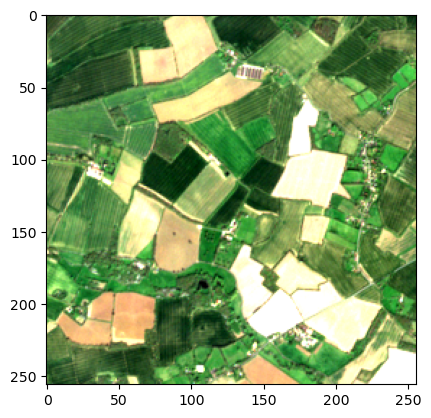

In [30]:
#temp = train_features[0].transpose(0,2)
temp = torch.flip(temp, [2])
print(temp[0][0][0:3])
print(temp.size())
plt.imshow(temp*0.001)

In [33]:
train_features = train_features.transpose(1,3)
#model.eval()
#print(ex)
#model(train_features)

In [35]:
import kornia as K

torch.Size([1, 12, 256, 256])
torch.Size([1, 12, 256, 256])
torch.Size([256, 256])


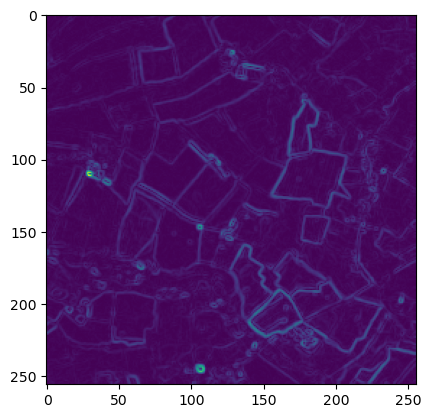

In [51]:
print(train_features.size())
x_sobel: torch.Tensor = K.filters.sobel(train_features)
print(x_sobel.size())

img_temp = x_sobel[0].transpose(0,2)[:,:,1]
print(img_temp.size())
plt.imshow(img_temp)

In [ ]:
# Data generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_datagen = ImageDataGenerator()

In [ ]:
from keras.models import Model, load_model
from keras.layers import Input, UpSampling2D
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.activations import relu, elu

In [ ]:
def unet_model(input_size=(512,512,3)):
    inputs = Input(input_size)

    # normalize the images
    s = Lambda(lambda x: x / 255) (inputs)

    c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
    c1 = Dropout(0.1) (c1)
    c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
    p1 = MaxPooling2D((2, 2)) (c1)

    c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
    c2 = Dropout(0.1) (c2)
    c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
    p2 = MaxPooling2D((2, 2)) (c2)

    c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
    c3 = Dropout(0.2) (c3)
    c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
    p3 = MaxPooling2D((2, 2)) (c3)

    c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
    c4 = Dropout(0.2) (c4)
    c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
    p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

    c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
    c5 = Dropout(0.3) (c5)
    c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
    c6 = Dropout(0.2) (c6)
    c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
    c7 = Dropout(0.2) (c7)
    c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
    c8 = Dropout(0.1) (c8)
    c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
    c9 = Dropout(0.1) (c9)
    c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

    model = Model(inputs=[inputs], outputs=[outputs])

    model.compile(optimizer='adam', loss='binary_crossentropy')

    #model.summary()
    return model

In [ ]:
batch_size = 4
model = unet_model()

In [ ]:
history = model.fit_generator(image_datagen.flow(x_train, y_train, batch_size = batch_size), 
                              steps_per_epoch=x_train.shape[0]/batch_size,
                              validation_data=(x_valid, y_valid), 
                              validation_steps=x_valid.shape[0]/batch_size,
                              epochs=25)

In [ ]:
#history = model.fit(
#    x=image_datagen.flow(x_train, y_train, batch_size = batch_size), y=None, batch_size=batch_size, epochs=5, verbose='auto',
#    callbacks=None, validation_split=0.0, validation_data=(x_valid, y_valid), shuffle=True,
#    class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=x_train.shape[0]/batch_size,
#    validation_steps=x_valid.shape[0]/batch_size, validation_batch_size=None, validation_freq=1,
#    max_queue_size=10, workers=1, use_multiprocessing=False
#)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

## Testing

In [6]:
model = load_model('model_dice80.h5')

2022-02-26 08:06:06.034102: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/studio-lab-user/.conda/envs/seg/lib/python3.9/site-packages/cv2/../../lib64:
2022-02-26 08:06:06.034136: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-26 08:06:06.034165: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (default): /proc/driver/nvidia/version does not exist
2022-02-26 08:06:06.034364: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
test_image_dict = {}
test_mask_dict = {}

In [8]:
for i in range(1000, 1200):
    try:
        test_image_dict[image_list[i]] = cv2.resize(cv2.imread(os.path.join(image_path,image_list[i])),(512,512))
    except:
        continue
    l_lip = ['{0:05}'.format(int(image_list[i].split('.',1)[0])) + '_l_lip']
    u_lip = ['{0:05}'.format(int(image_list[i].split('.',1)[0])) + '_u_lip']
            
    if os.path.exists(os.path.join(mask_path,l_lip[0]+'.png')):
        l_lip_image = cv2.imread(os.path.join(mask_path,l_lip[0]+'.png'))
    else:
        l_lip_image = np.zeros(test_image_dict[image_list[i]].shape)
            
    if os.path.exists(os.path.join(mask_path,u_lip[0]+'.png')):
        u_lip_image = cv2.imread(os.path.join(mask_path,u_lip[0]+'.png'))
    else:
        u_lip_image = np.zeros(test_image_dict[image_list[i]].shape)
                
    test_mask_dict[image_list[i]] = l_lip_image + u_lip_image

In [9]:
test_image = []
test_mask = []
for img, msk in zip(test_image_dict.values(), test_mask_dict.values()):
    test_image.append(img)
    test_mask.append(msk.astype('uint16'))
test_image = np.array(test_image)
test_mask = np.array(test_mask)

test_mask = test_mask[:,:,:,1]
test_mask = np.expand_dims(test_mask, axis=-1)

In [10]:
# Read the Test Images and their respective masks
x_test = test_image
y_test = test_mask

# Convert Masks to Binary Masks
y_test = np.where(y_test > 1, 1, 0)

In [11]:
import timeit
start = timeit.default_timer()

output = []
for test_img in x_test:
    output.append(model.predict(test_img.reshape(1,512,512,3))[0,:,:,:])
output = np.array(output)

stop = timeit.default_timer()

# Convert pixel values from float to integer
output = np.where(output > 0.9, 1, 0)
output = output.astype('uint8')

print('Time to inference the model for a single image:', (stop-start)/test_img.shape[0],'s')
print('A 30 FPS real-time engine will require ',1/30,'s inference time for a single Image')

Time to inference the model for a single image: 0.12603568673046794 s
A 30 FPS real-time engine will require  0.03333333333333333 s inference time for a single Image


In [ ]:
kernel = np.ones((5,4),np.uint8)
dilate_opt = []
for image in output:
    dilate_opt.append(cv2.dilate(image,kernel,iterations = 1))
dilate_opt = np.array(dilate_opt)
dilate_opt = np.expand_dims(dilate_opt, axis=-1)

In [ ]:
plt.figure(figsize=(10,10))

for i in list(np.linspace(1,13,4, dtype = int)):
    idx = randint(0,50)
    plt.subplot(6,4,i)
    plt.title('Image')
    plt.axis('off')
    plt.imshow(x_test[idx,:,:,:])

    plt.subplot(6,4,i+1)
    plt.title('Predicted')
    plt.axis('off')
    plt.imshow(output[idx,:,:,0])

    plt.subplot(6,4,i+2)
    plt.title('Dilating Predicted')
    plt.axis('off')
    plt.imshow(dilate_opt[idx,:,:,0])

    plt.subplot(6,4,i+3)
    plt.title('Actual')
    plt.axis('off')
    plt.imshow(y_test[idx,:,:,0])

plt.show()

In [ ]:
plt.figure(figsize=(10,10))

for i in list(np.linspace(1,4,4, dtype = int)):
    idx = randint(0,x_test.shape[0])
    plt.subplot(1,4,i)
    plt.title('Image')
    plt.axis('off')
    plt.imshow(cv2.bitwise_and(x_test[idx,:,:,:], x_test[idx,:,:,:], mask = output.astype('uint8')[idx,:,:,0]))

plt.show()

In [ ]:
def iou_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
    union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
    iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
    return iou

def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    dice = K.mean((2 * intersection + smooth)/(union + smooth), axis=0)
    return dice

In [ ]:
iou_score_with_dilation = iou_coef(y_test, dilate_opt.astype('int64'))
dice_score_with_dilation = dice_coef(y_test, dilate_opt.astype('int64'))

In [ ]:
print(iou_score_with_dilation)
print(dice_score_with_dilation)

In [ ]:
iou_score_without_dilation = iou_coef(y_test, output.astype('int64'))
dice_score_without_dilation = dice_coef(y_test, output.astype('int64'))

In [ ]:
print(iou_score_without_dilation)
print(dice_score_without_dilation)

In [ ]:
model.save('model_dice80.h5')

In [ ]:
os.getcwd()

In [ ]:
model = load_model('model_dice80.h5')

In [ ]:
model.save('model_dice80')